In [15]:
import sys, os
import serial
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import win32com.client
from astropy.io import fits
import threading
import nbimporter
from picoammeter_control import (
    send_cmd,
    query,
    init_cmds
)
from camera_control_ascom import (
    take_ramp,
    camera_init,
    populate_header
)
sys.path.insert(0, os.path.abspath('.'))
sys.path.insert(0, os.path.abspath('filter_wheel_control'))
from filter_wheel_control.wheel_controller import (
    list_devices,
    open_device,
    get_position,
    get_position_count,
    set_position,
    close_device
)
from data_helper_functions import (
    init_wheels,
    close_wheels,
    camera_init,
    picoam_stability,
    picoam_worker_exp,
    camera_with_picoam,
    collect_var_exp,
    var_exp_graphs,
    capture_frame,
    calculate_gain,
    get_gain,
    picoam_worker_filters,
    camera_with_filters,
    collect_var_filters,
    compare_exp_and_filter,
    collect_bias_frames
)

In [2]:
camera_init()
cam_name = "ASCOM.AtikCameras.Camera"
save_path= "C:/Users/Jonah/fits_imgs"

You selected: ASCOM.AtikCameras.Camera


In [19]:
min_exp = 0.0001
max_exp = 5.0

KEITHLEY INSTRUMENTS INC.,MODEL 6485,4070587,C01   Jun 23 2010 12:22:00/A02  /H
relative std: 4.3497752958727345e-11


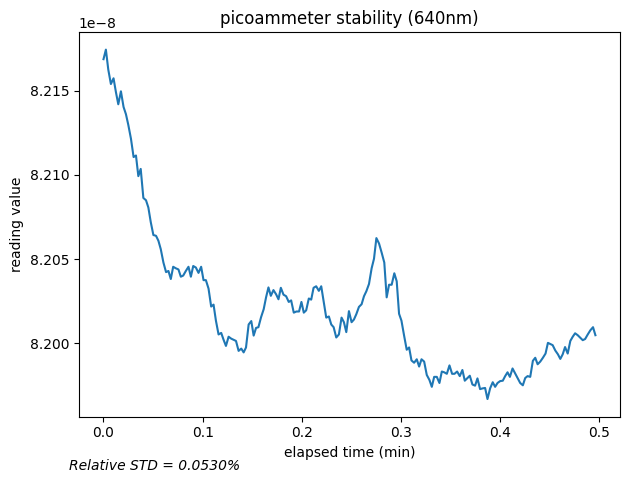

saved to path


In [16]:
picoam_stability(read_time = .5, save = save_path, port='COM5')

In [4]:
init_wheels(print_stuff=False)
close_wheels()

In [5]:
e_per_adu = get_gain(cam_name=cam_name, exp_time=min_exp, num_frames=3, print_stuff=True)

starting calculation
taking frame
taking frame
taking frame
flats collected
darks collected
Measured: 0.01957 e-/ADU on mode=176 gain
Flat mean: 990.3959453885498, Flat var: 6584.4
Dark mean: 969.6624966336514, Dark var: 5525.0


KEITHLEY INSTRUMENTS INC.,MODEL 6485,4070587,C01   Jun 23 2010 12:22:00/A02  /H
Camera connected: ASCOM.AtikCameras.Camera, Size: 9576x6380, Temperature: 24.96C
Taking frames at 0.00005000 seconds (exposure time 1/20)
Taking frames at 0.00009165 seconds (exposure time 2/20)
Taking frames at 0.00016799 seconds (exposure time 3/20)
Taking frames at 0.00030792 seconds (exposure time 4/20)
Taking frames at 0.00056442 seconds (exposure time 5/20)
Taking frames at 0.00103457 seconds (exposure time 6/20)
Taking frames at 0.00189635 seconds (exposure time 7/20)
Taking frames at 0.00347596 seconds (exposure time 8/20)
Taking frames at 0.00637137 seconds (exposure time 9/20)
Taking frames at 0.01167861 seconds (exposure time 10/20)
Taking frames at 0.02140666 seconds (exposure time 11/20)
Taking frames at 0.03923800 seconds (exposure time 12/20)
Taking frames at 0.07192249 seconds (exposure time 13/20)
Taking frames at 0.13183254 seconds (exposure time 14/20)
Taking frames at 0.24164651 seconds 

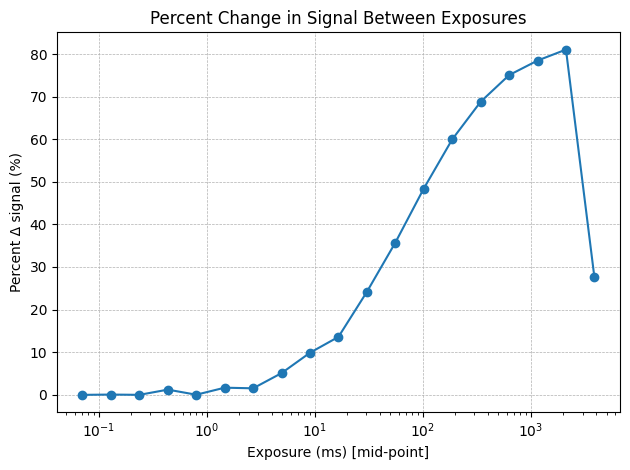

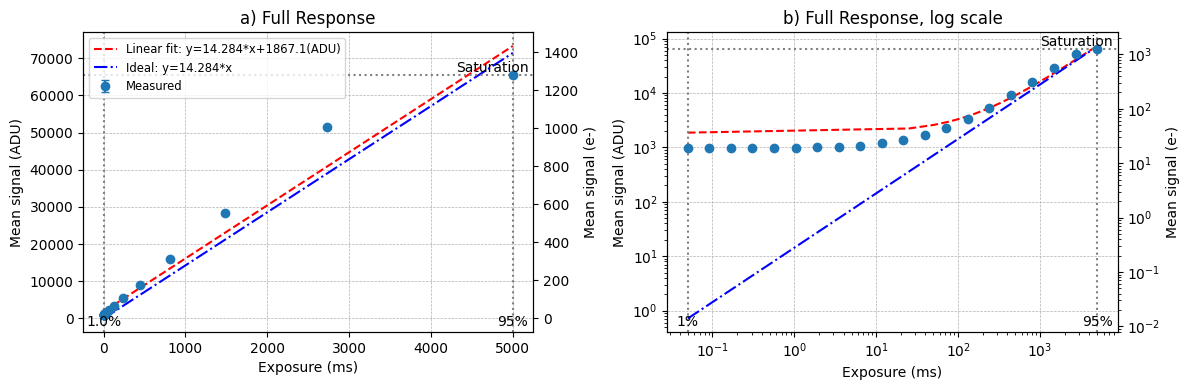

Figure saved to exp_5e-05-5.0_linearity_figure.png


In [22]:
I_flat, Q_ramp, mean_signal, std_signal, bit_depth, exp_times, exp_low, exp_high, exp_50 = (
    collect_var_exp(cam_name=cam_name, num_exp=20, num_frames=2, exp_low = min_exp, exp_high = max_exp, save_path=save_path, offset=0)
)

var_exp_graphs(mean_signal, std_signal, bit_depth, exp_times, exp_low, exp_high, save=True, e_per_adu=e_per_adu, min_percent=0.01, percent_change=True)

In [7]:
signals_f, Q_filt = collect_var_filters(save_path = save_path, cam_name=cam_name, exp_50=exp_50, num_frames=10, offset=0)


starting filter 1
starting filter 2
starting filter 3
starting filter 4
starting filter 5
starting filter 6
Wrote per-frame filter data to C:/Users/Jonah/fits_imgs\filter_frame_data.csv
finished


In [10]:
bias_level = collect_bias_frames(cam_name = cam_name,num_frames=500, exp_low=min_exp, save_path=save_path, offset=0)
print("bias level: ", bias_level)

Camera connected: ASCOM.AtikCameras.Camera, Size: 9576x6380, Temperature: 26.40C
Taking frames at 0.00100000 seconds (exposure time 1/1)
exp res: 0.00100000 seconds
Bias cube saved to C:/Users/Jonah/fits_imgs\bias_stack.fits
Bias means saved to C:/Users/Jonah/fits_imgs\bias_means.csv
bias level:  972.9270201139999


972.9270201139999
Figure saved to exp_vs_filter_figure.png


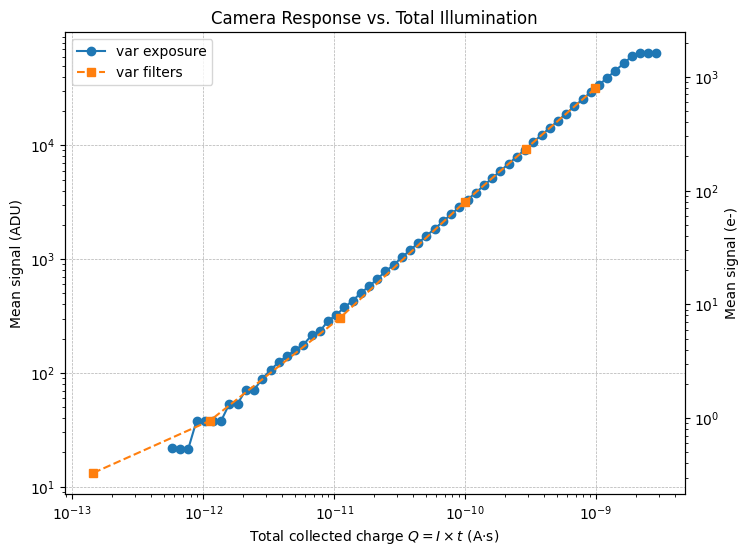

In [12]:
compare_exp_and_filter(e_per_adu = .025, Q_ramp=Q_ramp, Q_filt=Q_filt, signals_f=signals_f, mean_signal=mean_signal, bias_level=bias_level, save=True)
